In [1]:
#importing the required module and functions from ...
#the package for a quick formation evaluation

import petroeval as pet
from petroeval import evaluate_reservoir
from petroeval import log_plot, three_plots
from petroeval import FormationEvaluation
from petroeval import visualizations
from petroeval.visualizations import summary

In [2]:
#Reading/Importing a single lasio file

las = pet.read_lasio('BOGI 02.las')

In [3]:
#Reading/Importing multiple lasio files

las1 = 'ATAGA 5.LAS'  #file path
las2 = 'ATAGA 10.las'  #file path

dual_las = pet.read_lasios(las1, las2)
dual_las

[<lasio.las.LASFile at 0x7f1e84499050>, <lasio.las.LASFile at 0x7f1e84503910>]

In [4]:
#converting las file to dataframe

df = las.df()
df.head()

,CALI,DENS,GR,NPHI,RES,SONIC
DEPTH,,,,,,
2885.0,NaN,NaN,NaN,NaN,2000.0,NaN
2885.5,12.6341,NaN,45.1437,0.490197,2000.0,NaN
2886.0,12.6412,NaN,45.1437,0.490197,2000.0,NaN
2886.5,12.6316,1.5237,45.0078,0.523394,2000.0,NaN
2887.0,12.6412,1.5237,44.9925,0.541535,2000.0,NaN


In [5]:
#create the reservoir section object with the FormationEvaluation class
#Well log attributes/columns titles are passed as arguments

reservoir1 = FormationEvaluation(df, gr='GR', nphi='NPHI', dens='DENS',
                                 res='RES', top=2, bottom=20000, cutoff=72)

#The show_table method is used to create the table and the formation evaluation parameters

table = reservoir1.show_table(baseline_default=True)
print(reservoir1)

Default baseline 80 is used for evaluation
ESTIMATED PETROPHYSICAL PARAMETERS


In [7]:
#To check missing values before

table.isna().sum()

GR         1
LITHO      0
VSH        1
NET_PAY    0
PHIDF      2
PHIE       2
SW         2
OIL_SAT    2
dtype: int64

In [8]:
#fill missing values using mean values of the columns, specify value if mean shouldn't be applied

df1 = reservoir1.fill_missing(use_mean=False, value=55)
df1.isna().sum()

Filling missing values...


CALI     0
DENS     0
GR       0
NPHI     0
RES      0
SONIC    0
dtype: int64

In [9]:
pet.visualizations.summary(table)

Title: Petrophysical Summary of the Parameters Evaluated


,GR,LITHO,VSH,NET_PAY,PHIDF,PHIE,SW,OIL_SAT
count,11213.000000,11214.000000,11213.000000,11214.000000,11212.000000,11212.000000,11212.000000,11212.000000
mean,60.407293,0.679508,0.133508,0.618602,0.295596,0.263760,0.221528,0.778472
std,23.974209,0.466687,0.149388,0.485752,0.079330,0.101156,0.056422,0.056422
min,18.512900,0.000000,0.000000,0.000000,0.150000,0.000000,0.112375,0.624629
25%,37.009900,0.000000,0.000000,0.000000,0.231136,0.164213,0.181018,0.742312
50%,63.009400,1.000000,0.065897,1.000000,0.303091,0.279859,0.203559,0.796441
75%,82.896100,1.000000,0.262463,1.000000,0.346864,0.338424,0.257688,0.818982
max,153.566100,1.000000,1.000000,1.000000,0.600000,0.600000,0.375371,0.887625


In [10]:
#Printng out a summary of the petrophysical estimates
#baseline_default argument is set to False, so specified shale baseline cutoff is used

print(reservoir1.parameters(baseline_default=False))  

72 will be used for evaluation
ESTIMATED PETROPHYSICAL PARAMETERS
{'Gross rock': 6329, 'The Net to Gross is:': 0.8925580660451888, 'Net Pay of reservoir:': 5649, 'Total Porosity:': 0.2955958767121808, 'Effective Porosity:': 0.2637600963069633, 'Water Saturation:': 0.22152775792614243, 'Oil Saturation:': 0.7784722420738576}


NameError: Attritubute not found. Specify attribute. 'DataFrame' object has no attribute 'RHOB'


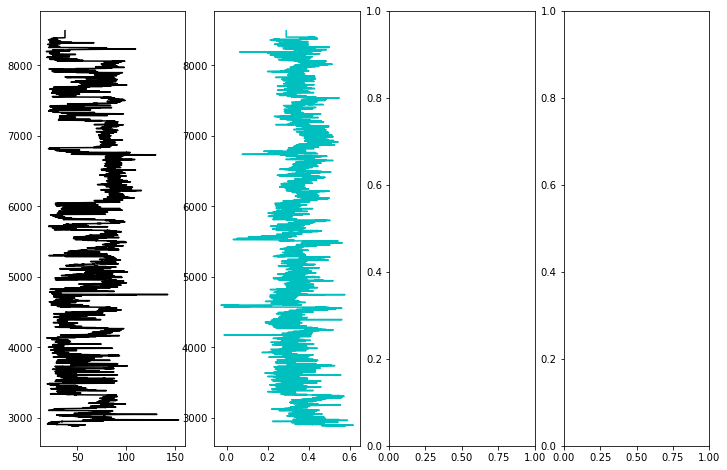

In [11]:
pet.log_plot(df)

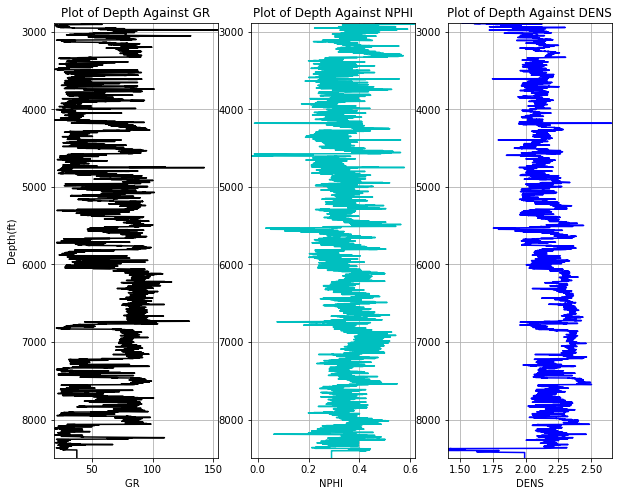

In [12]:
pet.three_plots(df, x1='GR', x2='NPHI', x3='DENS')